In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
pd.set_option('display.max_rows', 1000) 

df = pd.read_csv('ivf_data.csv') 

# converts valid date entries to date, changes non-valid entries (. and nan) to NaT 
df["DATE"] = pd.to_datetime(df["DATE"], infer_datetime_format=True, errors='coerce') 

 
df = df.iloc[0:314,:] 
print(len(df))

314


In [2]:
df = df[df["BLAST_D8"]!="."]
#delete two outliers
df = df[(df["VCL"] * df["ALH"]) != 9160.5]

In [3]:
df

,NUM,DATE,SAMPLE,REPLICATE,ANIMAL,BATCH,SUB_1_RP,SUB_2_H,SUB_3_LS,SUB_4_LP,...,LIN,MOTILE_PCT,PROGRESSIVE_PCT,RAPID_PCT,MEDIUM_PCT,SLOW_PCT,STATIC_PCT,CLIV,BLAST_D8,CELLS_COUNT
0,1.0,2015-07-16,135,26,PANDIAH,1305,26.32,15.76,21.64,36.29,...,44.0,45.0,37.0,44.0,1.0,6.0,49.0,82.716,33.333,188.750
1,2.0,2015-08-21,180,33,PANDIAH,1305,26.32,15.76,21.64,36.29,...,48.0,74.0,60.0,70.0,4.0,9.0,17.0,79.012,16.049,.
2,3.0,2015-08-28,191,34,PANDIAH,1305,26.32,15.76,21.64,36.29,...,47.0,41.0,30.0,37.0,3.0,26.0,34.0,76.923,20.253,184.500
3,4.0,2015-09-15,205,36,PANDIAH,130503,26.32,15.76,21.64,36.29,...,69.0,50.0,15.0,18.0,31.0,37.0,13.0,77.027,27.027,.
4,5.0,2015-10-01,227,38,PANDIAH,130503,26.32,15.76,21.64,36.29,...,51.0,63.0,54.0,59.0,4.0,16.0,22.0,76.829,39.024,169.500
5,6.0,2015-10-06,233,39,PANDIAH,130503,26.32,15.76,21.64,36.29,...,47.0,59.0,47.0,54.0,5.0,14.0,27.0,66.154,25.806,184.889
6,7.0,2015-10-08,240,40,PANDIAH,130503,26.32,15.76,21.64,36.29,...,60.0,40.0,29.0,31.0,9.0,3.0,57.0,82.192,34.247,207.000
7,8.0,2015-10-20,248,41,PANDIAH,130503,26.32,15.76,21.64,36.29,...,51.0,43.0,32.0,36.0,7.0,20.0,37.0,67.606,23.611,263.500
8,9.0,2015-10-29,261,42,PANDIAH,130503,26.32,15.76,21.64,36.29,...,61.0,43.0,40.0,41.0,2.0,2.0,55.0,61.765,23.529,154.143
9,10.0,2015-11-19,269,43,PANDIAH,130503,26.32,15.76,21.64,36.29,...,64.0,36.0,32.0,34.0,2.0,8.0,56.0,81.690,35.211,.


In [ ]:
""""
df_2 = df.loc[:,["MOTILE_PCT"]]
df_2["AI"] = df.loc[:,["AI"]]
blast = pd.to_numeric(df["BLAST_D8"],errors='coerce')
new.loc[blast > 25, "class"] = 1
df_2.loc[blast < 25, "class"] = -1
""""

MAKING THE SUBGROUPS: STEPS (three-step statistical analysis proposed by Núñez-Martínez, Moran and Peña (2006)) 

components they used: VAP, VSL, VCL, ALH, BCF, STR, LIN, WOB and DANCE <br>
out of those, we have: VAP, VSL, VCL, ALH, BCF, STR, LIN <br>
and can calculate the other two: WOB- Wobble = (VAP/VCL) x 100; DNC- Dance = VCL x ALH. <br>
BUT for Dance ALH mean should be used. Is our ALH max or mean?? <br>

1. PCA 
    Three main components: PC1 presents nonlinear fast movements, PC2 represents slow and linear movements and PC3 presents oscillatory movements.
2. K-MEANS MODEL using Euclidean Multivariate Distance
3. Discriminant method to reduce number of clusters (Hierarchical dendogram analysis??)

(4. Comparison of subgroups in each group via chi-square test??)

conduct this for each of the four groups HIGH CLEAVAGE, LOW CLEAVAGE, HIGH BLASTOCYST RATE, LOW BLASTOCYST RATE <br>
compare groups <br>
for new sample, see if can predict. <br>


In [3]:
# Isolate motility features and add new ones
motility = df.loc[:,["VAP"]]
motility["VSL"] = pd.to_numeric(df["VSL"])
motility["VCL"] = pd.to_numeric(df["VCL"])
motility["ALH"] = pd.to_numeric(df["ALH"])
motility["BCF"] = pd.to_numeric(df["BCF"])
motility["STR"] = pd.to_numeric(df["STR"])
motility["LIN"] = pd.to_numeric(df["LIN"])
motility["VAP"] = pd.to_numeric(motility["VAP"])
motility["WOB"] = (motility["VAP"]/motility["VCL"]) * 100
motility["DNC"] = motility["VCL"] * motility["ALH"] 

group_pct = df.loc[:,["MOTILE_PCT"]]
group_pct["PROGRESSIVE_PCT"] = pd.to_numeric(df["PROGRESSIVE_PCT"])
group_pct["RAPID_PCT"] = pd.to_numeric(df["RAPID_PCT"])
group_pct["MEDIUM_PCT"] = pd.to_numeric(df["MEDIUM_PCT"])
group_pct["SLOW_PCT"] = pd.to_numeric(df["SLOW_PCT"])
group_pct["STATIC_PCT"] = pd.to_numeric(df["STATIC_PCT"])
group_pct["MOTILE_PCT"] = pd.to_numeric(group_pct["MOTILE_PCT"])

# get results
blasrate = pd.to_numeric(df["BLAST_D8"])
cleavage = pd.to_numeric(df["CLIV"])

blasrate_bin = blasrate.copy()
blasrate_bin[blasrate > np.mean(blasrate) ] = "High"
blasrate_bin[blasrate_bin != "High" ] = "Low"

# create four groups with entries HB/LB = high/low blastocyst rate, HC/LC = high/low cleavage
HB = motility[blasrate > np.mean(blasrate)]
LB = motility[blasrate <= np.mean(blasrate)]
HC = motility[cleavage > np.mean(cleavage)]
LB = motility[cleavage <= np.mean(cleavage)]

In [4]:
from sklearn import preprocessing
def norm(df):
    # Normalises by removing the mean and scaling to unit variance
	scaler = preprocessing.StandardScaler()
	x_scaled = scaler.fit_transform(df)
	df_normalized = pd.DataFrame(x_scaled)
	return df_normalized

In [5]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

def calc_pca(df, colnames): #to three components!
    pca = PCA(n_components=3)
    train_trans = pca.fit_transform(df)
    components = pca.components_.T
    for n in range(3):
        idx = (-abs(components[:,n])).argsort()[:5]
        print("For principal component", n+1)
        print("Most relevant features are", colnames[idx])
        print("With respective values", components[idx,n])
    #fig = plt.figure()
    #ax = fig.gca(projection='3d')
    #ax.scatter(train_trans[:,0], train_trans[:,1], train_trans[:,2])
    
    return train_trans, components

def show_pca_components(pca_components, colnames): #for three main components! 
    labels = colnames

    x = np.arange(len(labels))  # the label locations
    width = 0.25  # the width of the bars
    
    pca_components = abs(pca_components)
    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width, pca_components[:,0], width, label='PC1')
    rects2 = ax.bar(x, pca_components[:,1], width, label="PC2")
    rects3 = ax.bar(x + width, pca_components[:,2], width, label='PC3')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Eigenvector value (absolute)')
    ax.set_title('Value of eigenvector of the Principal Components for each variable')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    fig.tight_layout()

    plt.show()    
    
    
    
def clustering(df, num_centroids):
    kmeans = KMeans(num_centroids).fit(df)
    labels = kmeans.labels_    
    return labels


def plot_characteristics(df, labels, clusters, prints = True): #, colnames):
    #fig, axis = plt.subplots(1,len(colnames), figsize=(15,7))
    #colours = ["r", "k", "b", "g"]
    summary = pd.DataFrame(columns= df.columns.values)
    
    for c in range(clusters):
        group = df[labels == c]
        means = np.mean(group, axis=0)
        print("std is", np.std(group, axis=0))
        summary = summary.append(means, ignore_index=True)
    
    for var in df.columns.values:
        for clusA in range(clusters):
            for clusB in range(clusA + 1, clusters):
                df_var = df[var]
                dfA = df_var[labels == clusA]
                dfB = df_var[labels == clusB]
                t_test(dfA, dfB, var, clusA, clusB, prints = prints)
                         
        """
        var = 0
        for ax in axis.flat:
            ax.set_title(colnames[var])
            ax.errorbar(c, means[var], yerr= stds[var], ecolor = colours[c], label = "{}".format(c))
            ax.plot(c, means[var], 'ok')
            var = var+1
            plt.legend()
    plt.tight_layout()
    plt.show()
    """
    return summary

from scipy.stats import ttest_ind
def t_test(dfA, dfB, varname, clusA, clusB, prints = True):
    p_val = ttest_ind(dfA, dfB)[1]    
    if p_val > 0.05:
        if prints == True:
            print("non-significant in var", varname, "in clusters", clusA, clusB )
        return 0
    else:
        #if prints == True:
            #print("significant in var", varname, "in clusters", clusA, clusB )
        return 1

[4.77950289e+00 3.11148822e+00 6.60119493e-01 2.92238272e-01
 1.39407811e-01 2.76849847e-02 1.43471237e-02 1.21449407e-03
 3.12292022e-03]
For principal component 1
Most relevant features are ['LIN' 'STR' 'WOB' 'ALH' 'DNC']
With respective values [ 0.41963165  0.39936336  0.39725196 -0.39646846 -0.37009817]
For principal component 2
Most relevant features are ['VAP' 'VSL' 'VCL' 'DNC' 'WOB']
With respective values [0.55864301 0.53189437 0.44357585 0.31984354 0.18615604]
For principal component 3
Most relevant features are ['BCF' 'WOB' 'LIN' 'ALH' 'VCL']
With respective values [-0.73826809  0.35974076  0.346581    0.32359781 -0.29458736]


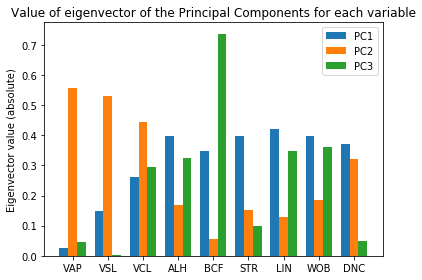

In [10]:
#PCA and analysis
motility_norm = norm(motility)
w, v = np.linalg.eig(motility_norm.cov())
print(w)
sets, comps = calc_pca(motility_norm, motility.columns.values)
show_pca_components(comps, motility.columns.values)

[9.97625283e+02 2.10071273e+02 5.47829354e+01 1.74646689e-01
 2.75482614e+01 1.20709701e+01]
For principal component 1
Most relevant features are ['RAPID_PCT' 'MOTILE_PCT' 'PROGRESSIVE_PCT' 'STATIC_PCT' 'SLOW_PCT']
With respective values [ 0.56780542  0.55286231  0.48496934 -0.3660239  -0.05140728]
For principal component 2
Most relevant features are ['STATIC_PCT' 'RAPID_PCT' 'SLOW_PCT' 'PROGRESSIVE_PCT' 'MOTILE_PCT']
With respective values [-0.89350091 -0.30103292  0.26155138 -0.16789403 -0.11168847]
For principal component 3
Most relevant features are ['SLOW_PCT' 'MEDIUM_PCT' 'MOTILE_PCT' 'PROGRESSIVE_PCT' 'STATIC_PCT']
With respective values [-0.82360046 -0.35019301 -0.26247906  0.2405564  -0.21768825]


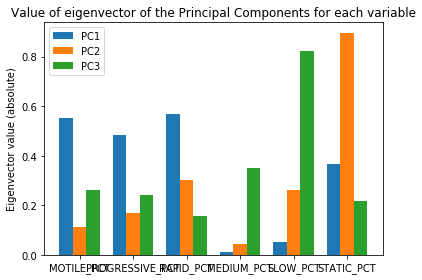

In [7]:
#PCA and analysis
w, v = np.linalg.eig(group_pct.cov())
print(w)
sets, comps = calc_pca(group_pct, group_pct.columns.values)
show_pca_components(comps, group_pct.columns.values)

PCA of the whole dataset, analysis of loadings:
1. PC1 relates to the type of movement (straight/wobble)
2. PC2 relates to velocities
3. PC3 relates to type of movement too - but mostly oscillations

and thus, Variables chosen for clustering are:  <br>
- LIN (highest PC1)
- VCL (good PC2 and combo of PC1 and PC3, plus lin involves vap and vsl
- ALH (best PC3 and good PC1 and PC2)

In [11]:
new_motility = motility.loc[:,["LIN"]]
new_motility["VCL"] = pd.to_numeric(motility["VCL"])
new_motility["ALH"] = pd.to_numeric(motility["ALH"])
new_motility["LIN"] = pd.to_numeric(new_motility["LIN"])
new_motility_norm = norm(new_motility)

For principal component 1
Most relevant features are ['ALH' 'DNC' 'LIN' 'STR' 'WOB']
With respective values [ 0.4276085   0.41037458 -0.39194395 -0.37033178 -0.3641124 ]
For principal component 2
Most relevant features are ['VAP' 'VSL' 'VCL' 'WOB' 'DNC']
With respective values [0.58192738 0.56597408 0.38864274 0.24601037 0.22542816]
For principal component 3
Most relevant features are ['BCF' 'WOB' 'LIN' 'VCL' 'ALH']
With respective values [ 0.78399399 -0.40257421 -0.30800361  0.27670843 -0.22597155]


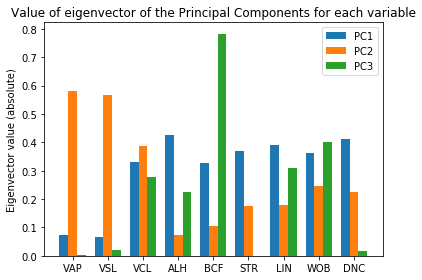

For principal component 1
Most relevant features are ['DNC' 'ALH' 'LIN' 'STR' 'WOB']
With respective values [ 0.41895772  0.41491343 -0.39550183 -0.36785889 -0.35930017]
For principal component 2
Most relevant features are ['VAP' 'VSL' 'VCL' 'WOB' 'DNC']
With respective values [0.59328142 0.56573532 0.4384644  0.25180926 0.20468245]
For principal component 3
Most relevant features are ['BCF' 'WOB' 'LIN' 'ALH' 'VCL']
With respective values [ 0.69450389 -0.4042924  -0.39347745 -0.34121385  0.27611509]


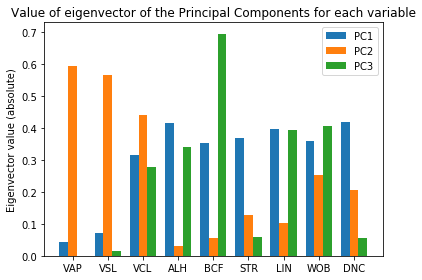

In [12]:
# going to do the steps on HB and LB separately
#PCA and analysis
HB_norm = norm(HB)
sets, comps = calc_pca(HB_norm.cov(), motility.columns.values)
show_pca_components(comps, motility.columns.values)

LB_norm = norm(LB)
sets, comps = calc_pca(LB_norm.cov(), motility.columns.values)
show_pca_components(comps, motility.columns.values)


In [13]:
test_new = motility.loc[:,["BCF"]]
test_new["VAP"] = pd.to_numeric(motility["VAP"])
test_new["DNC"] = pd.to_numeric(motility["DNC"])
test_new["BCF"] = pd.to_numeric(test_new["BCF"])
#new_motility_norm = norm(new_motility)
HB_new = HB.loc[:,["BCF"]]
HB_new["VAP"] = pd.to_numeric(HB["VAP"])
HB_new["DNC"] = pd.to_numeric(HB["DNC"])
HB_new["BCF"] = pd.to_numeric(HB_new["BCF"])

LB_new = LB.loc[:,["BCF"]]
LB_new["VAP"] = pd.to_numeric(LB["VAP"])
LB_new["DNC"] = pd.to_numeric(LB["DNC"])
LB_new["BCF"] = pd.to_numeric(LB_new["BCF"])

In [14]:
labels = clustering(test_new, 3)
plot_characteristics(test_new, labels, 3)

std is BCF      5.096439
VAP     15.378927
DNC    165.617937
dtype: float64
std is BCF      4.141678
VAP     14.675309
DNC    166.260741
dtype: float64
std is BCF      3.083888
VAP     15.217781
DNC    212.009639
dtype: float64


,BCF,VAP,DNC
0,37.524490,89.976531,837.355918
1,33.287313,99.280597,1340.265970
2,30.174359,111.269231,1962.846667


In [28]:
test_new = motility.loc[:,["VCL"]]
test_new["ALH"] = pd.to_numeric(motility["ALH"])
test_new["DNC"] = pd.to_numeric(motility["DNC"])
test_new["VCL"] = pd.to_numeric(test_new["VCL"])
labels = clustering(test_new, 3)
plot_characteristics(test_new, labels, 3)


std is VCL     19.108404
ALH      1.198960
DNC    165.617937
dtype: float64
std is VCL     14.711341
ALH      0.785206
DNC    214.943942
dtype: float64
std is VCL     14.667217
ALH      0.631992
DNC    163.034207
dtype: float64


,VCL,ALH,DNC
0,147.301020,5.727551,837.355918
1,208.676250,9.371250,1955.040500
2,177.173485,7.535606,1335.563939


['VAP' 'VSL' 'VCL' 'ALH' 'BCF' 'STR' 'LIN' 'WOB' 'DNC']
std is VAP     13.479493
VSL     15.052494
VCL     17.401932
ALH      0.728780
BCF      4.486173
STR      5.245981
LIN      8.576053
WOB      6.886750
DNC    128.745382
dtype: float64
std is VAP     13.709652
VSL     15.722052
VCL     11.293874
ALH      0.566772
BCF      4.549532
STR      4.206995
LIN      5.910878
WOB      4.932536
DNC    100.061725
dtype: float64
std is VAP     15.493656
VSL     19.072774
VCL     14.113897
ALH      0.833973
BCF      2.720601
STR      5.954761
LIN      6.979836
WOB      5.761206
DNC    143.993158
dtype: float64
std is VAP    13.099025
VSL    14.224445
VCL    11.151144
ALH     0.375853
BCF     4.015282
STR     4.672046
LIN     6.780575
WOB     4.938038
DNC    88.455907
dtype: float64
std is VAP     15.777900
VSL     16.618532
VCL     11.691637
ALH      0.578504
BCF      3.098205
STR      4.091966
LIN      5.775782
WOB      5.432844
DNC    129.647452
dtype: float64
std is VAP     16.937777
VSL     

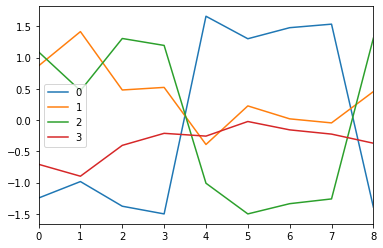

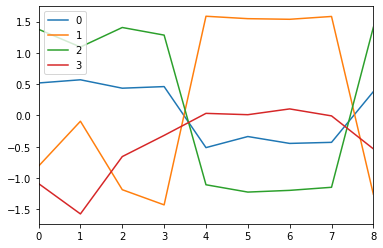

In [18]:
print(HB.columns.values)
labelsHB = clustering(HB_new, 4)
summaryHB = plot_characteristics(HB, labelsHB, 4, prints = False)
#display(summary.transpose())
summary_normHB = norm(summaryHB).transpose()
summary_normHB.plot()
labelsLB = clustering(LB_new, 4)
summaryLB = plot_characteristics(LB, labelsLB, 4, prints = False)
#display(summary.transpose())
summary_normLB = norm(summaryLB).transpose()
summary_normLB.plot()

# in these plots, x-axis are variables, in same order in both plots
# both plots are normalised values for each variable, top is HB and bottom is LB
# We can identify that there are sugroups behaving similarly in for both
#these are plotted below

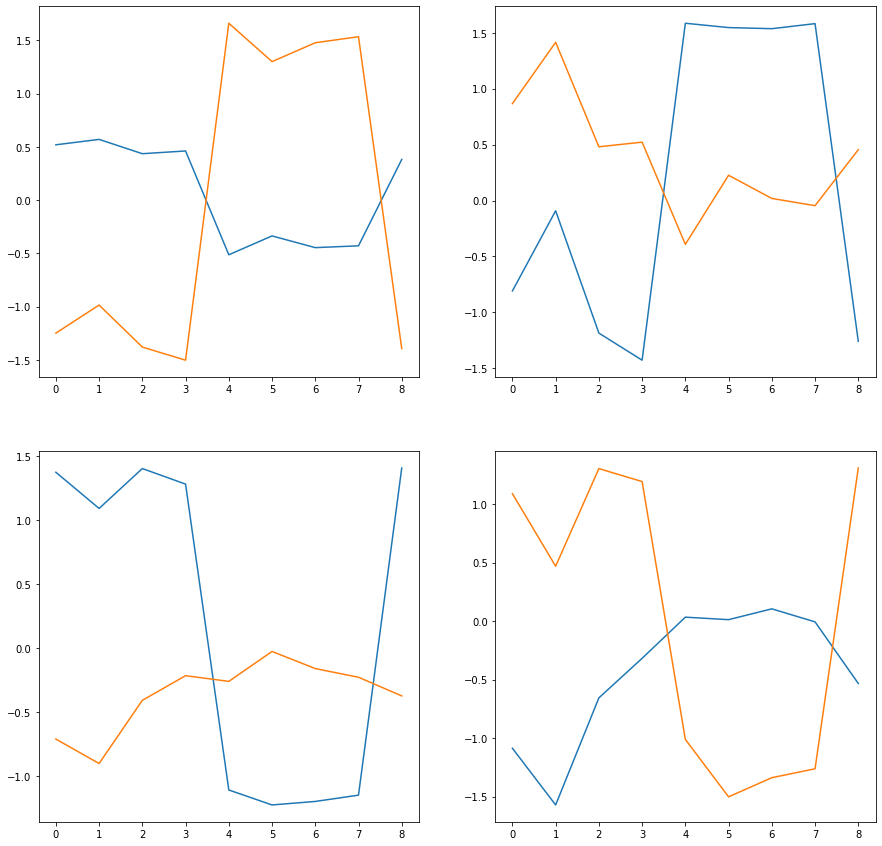

In [30]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(15,15))
ax1.plot(summary_normLB.iloc[:,0])
ax1.plot(summary_normHB.iloc[:,0])
ax2.plot(summary_normLB.iloc[:,1])
ax2.plot(summary_normHB.iloc[:,1])
ax3.plot(summary_normLB.iloc[:,2])
ax3.plot(summary_normHB.iloc[:,3])
ax4.plot(summary_normLB.iloc[:,3])
ax4.plot(summary_normHB.iloc[:,2])

#these plots show the normalised values for the variables (where vars are 1-8 in x axis),
# in LB (orange) - HB (blue) pairs with corresponding distributions

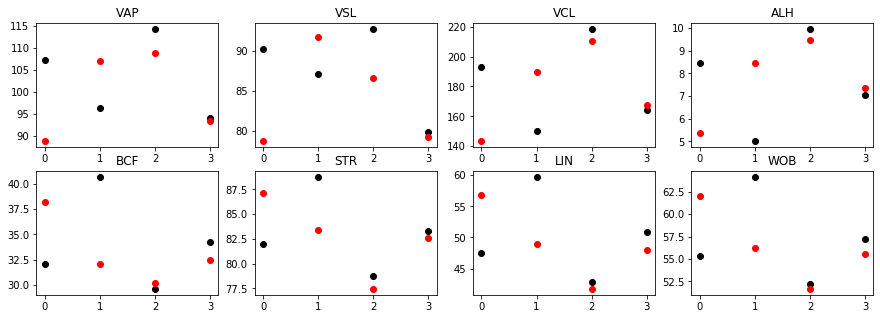

In [31]:
summaryLB_t = summaryLB.transpose()
summaryHB_t = summaryHB.transpose()

fig, axis = plt.subplots(2,4, figsize=(15,5))
counter = 0
for ax in axis.flat:
    ax.set_title(summaryLB.columns.values[counter])
    ax.plot(0, summaryLB_t.iloc[counter, 0], "ok" )
    ax.plot(0, summaryHB_t.iloc[counter, 0], "or" )
    ax.plot(1, summaryLB_t.iloc[counter, 1], "ok" )
    ax.plot(1, summaryHB_t.iloc[counter, 1], "or" )
    ax.plot(2, summaryLB_t.iloc[counter, 2], "ok" )
    ax.plot(2, summaryHB_t.iloc[counter, 2], "or" )
    ax.plot(3, summaryLB_t.iloc[counter, 3], "ok" )
    ax.plot(3, summaryHB_t.iloc[counter, 3], "or" )
    counter = counter + 1 
plt.show()

# these graphs show the (real) averages for each variable in each cluster 
# for HB (red) and LB (black), where the clusters have been paired up according to graphs above

In [32]:
# creating matrices to be used in next section
df_mot = df.loc[:,["VAP"]]
df_mot["VSL"] = pd.to_numeric(df["VSL"])
df_mot["VCL"] = pd.to_numeric(df["VCL"])
df_mot["ALH"] = pd.to_numeric(df["ALH"])
df_mot["BCF"] = pd.to_numeric(df["BCF"])
df_mot["STR"] = pd.to_numeric(df["STR"])
df_mot["LIN"] = pd.to_numeric(df["LIN"])
df_mot["VAP"] = pd.to_numeric(df_mot["VAP"])
df_mot["WOB"] = (df_mot["VAP"]/df_mot["VCL"]) * 100
df_mot["DNC"] = df_mot["VCL"] * df_mot["ALH"] 
df_mot["BLAST_D8"] = pd.to_numeric(df["BLAST_D8"])

In [26]:
"""
Now going to create a function with input training and testing sets. it will
- cluster on training (on chosen traits)
- find averages for each var in the eight clusters (HB and LB with 4 clusters each)
- find distances between entry test and each cluster, and assign HB/LB and cluster type
    (i can find distances between the clustered vars, or others. how to choose??)
- compare with testing results
"""
from scipy.spatial import distance

def select_traits(df, clustering_vars):
    df_selected = df.loc[:,[clustering_vars[0]]]
    df_selected[clustering_vars[0]] = pd.to_numeric(df_selected[clustering_vars[0]])
    for var in range(1, len(clustering_vars)):
        df_selected[clustering_vars[var]] = pd.to_numeric(df[clustering_vars[var]])
    return df_selected

def accuracy(correct, predicted, classes):
    accuracy=[]
    for label in classes:    
        accuracy.append(np.mean([(x == y)  for x, y in zip(correct,predicted) if x==label]))  

    accuracy.append(np.mean([(x == y)  for x, y in zip(correct,predicted)] ) )
    return accuracy

def high_or_low_blastrate(training, training_blasrate, testing, testing_blasrate, clustering_vars):
    # create matrices with chosen traits, cluster and produce average matrices
    HB = training[training_blasrate > 25]
    LB = training[training_blasrate <= 25]
    HB_new = select_traits(HB, clustering_vars)
    LB_new = select_traits(LB, clustering_vars)
    
    labelsHB = clustering(HB_new, 4)
    summaryHB = plot_characteristics(HB_new, labelsHB, 4, prints = False)

    labelsLB = clustering(LB_new, 4)
    summaryLB = plot_characteristics(LB_new, labelsLB, 4, prints = False)

    testing = select_traits(testing, clustering_vars)
    # for each entry in testing, find distances with each cluster
    predicted = []
    real = []
    for i in range(len(testing)):
        distancesHB = np.zeros(4,)
        distancesLB = np.zeros(4,)
        
        for c in range(4):
            distancesHB[c] = distance.euclidean(summaryHB.iloc[c, :], testing.iloc[i,:])
            distancesLB[c] = distance.euclidean(summaryLB.iloc[c, :], testing.iloc[i,:])

        # find lowest distance
        print(distancesHB)
        print(distancesLB)
        print(np.mean(distancesHB), np.mean(distancesLB))
        if abs(min(distancesHB) - min(distancesLB)) < 30:
            print("very close, very unsure")

        if abs(min(distancesHB) - min(distancesLB)) > 100:
            print("very sure of this prediction")

        if min(distancesHB) > min(distancesLB):
            predicted.append("HB")
            print("pred is HB")
        if min(distancesHB) <= min(distancesLB):
            predicted.append("LB")
            print("pred is LB")
        if testing_blasrate.iloc[i] > 25:
            real.append("HB")
            print("res is HB")
        if testing_blasrate.iloc[i] <= 25:
            real.append("LB") 
            print("res is HB")
        print("\n")
    print(real)
    results = accuracy(real, predicted, ["LB", "HB"])
    print(results)

In [29]:
train_set = df_mot.sample(frac=0.80)
test_set = df_mot.drop(train_set.index)
train_set_labels = pd.to_numeric(train_set.pop('BLAST_D8'))
test_set_labels = pd.to_numeric(test_set.pop('BLAST_D8'))

high_or_low_blastrate(train_set, train_set_labels, train_set, train_set_labels,  ["VCL", "ALH", "DNC"])
#I am getting very low results when testing with itself. How to improve?

std is VCL     19.671314
ALH      0.730435
DNC    131.522927
dtype: float64
std is VCL      9.290914
ALH      0.518202
DNC    154.497493
dtype: float64
std is VCL    13.812040
ALH     0.557692
DNC    86.768994
dtype: float64
std is VCL     12.994524
ALH      0.301644
DNC    100.408435
dtype: float64
std is VCL     15.201463
ALH      0.638500
DNC    125.584898
dtype: float64
std is VCL     10.122297
ALH      0.575321
DNC    114.480392
dtype: float64
std is VCL     13.616132
ALH      0.733268
DNC    214.251311
dtype: float64
std is VCL    20.389163
ALH     1.002944
DNC    97.507950
dtype: float64
[512.41786032 714.40272813 334.74763184  30.35507337]
[489.17934467 305.71516288 810.45580727 114.15813401]
397.98082341420337 429.87711220932835
pred is LB
res is HB


[488.99731045 737.82566396 358.16787723   7.16407749]
[465.75184237 329.1297224  833.88060385  90.74021257]
398.03873228126565 429.8755952993784
pred is LB
res is HB


[1051.68303991  175.33005922  204.74552775  569.60784241]
[10

[625.47250916 601.38424707 221.72006151 143.45141089]
[602.13913265 192.65280833 697.45812018 227.23268911]
398.007057159064 429.8706875692543
pred is LB
res is HB


[911.74011396 315.07834364  64.62102018 429.64561325]
[888.46166268  93.76123817 411.13689068 513.48111792]
430.27127275902467 476.71022736408685
very close, very unsure
pred is LB
res is HB


[954.50531353 272.32166166 107.43248029 472.41139112]
[931.24976462 136.57441425 368.35879729 556.25017332]
451.66771164962 498.1082873725352
very close, very unsure
pred is LB
res is HB


[761.62041993 465.23755491  85.58630627 279.5568818 ]
[738.28388371  56.50162258 561.31873516 363.36932384]
398.0002907269694 429.8683913224568
very close, very unsure
pred is HB
res is HB


[1574.76644532  348.03718178  727.66970056 1092.68064237]
[1551.52483179  756.76396476  251.93423979 1176.52131989]
935.7884925081432 934.186089057753
pred is HB
res is HB


[410.89277759 816.3406871  436.725401    73.11099219]
[387.27411449 407.61266576 912.43

[237.96753605 990.28349999 610.89946271 246.36948496]
[ 216.3551187   581.99127694 1086.2198622   163.23525341]
521.3799959263015 511.9503778125812
pred is HB
res is HB


[547.81579347 679.31835016 299.7348674   67.0543666 ]
[524.28902899 270.60805164 775.41907224 149.96038022]
398.48084440593 430.0691332730773
pred is LB
res is HB


[824.91073877 402.27087056  25.15968415 342.99597273]
[801.4388851   11.18148889 498.38779838 426.74097773]
398.83431655132586 434.43728752526243
very close, very unsure
pred is HB
res is HB


[380.73002292 846.13052827 466.51592267 101.48894879]
[357.7295243  437.51410026 942.1561059   18.36194018]
448.71635566173956 438.940417660705
pred is HB
res is HB


[769.94028821 456.98856699  77.96600976 287.90597988]
[746.80687884  49.93071033 552.97235355 371.74001495]
398.2002112108676 430.36248941700455
very close, very unsure
pred is HB
res is HB


[815.41662307 411.42482982  31.7698108  333.33641717]
[792.09701767   3.08742025 507.50280303 417.15953726]
397.

[1051.68303991  175.33005922  204.74552775  569.60784241]
[1028.48492443  233.89390345  271.22708449  653.44902621]
500.3416173237679 546.7637346429594
pred is LB
res is HB


[598.10992377 628.97219435 249.39591667 116.60904347]
[574.61972079 220.26499497 725.07282722 200.07800211]
398.2717695644914 430.00888627156877
pred is LB
res is HB


[510.94950611 716.16767731 336.5611125   31.76374295]
[487.42171152 307.44322606 812.26515929 113.22713891]
398.86050971891217 430.08930894482506
pred is LB
res is HB


[380.73002292 846.13052827 466.51592267 101.48894879]
[357.7295243  437.51410026 942.1561059   18.36194018]
448.71635566173956 438.940417660705
pred is HB
res is HB


[  77.1935296  1303.25897444  923.59488674  558.60469235]
[  99.75254633  894.52037779 1399.33054832  474.76733317]
715.663020783356 717.0927014009496
very close, very unsure
pred is LB
res is HB


[547.81579347 679.31835016 299.7348674   67.0543666 ]
[524.28902899 270.60805164 775.41907224 149.96038022]
398.48084440593

444.76310727832566 491.1941984904637
very close, very unsure
pred is LB
res is HB


[1353.35304462  126.55583831  506.21372352  871.25889419]
[1330.07207172  535.29688608   30.53138656  955.09685539]
714.3453751602174 712.7492999379228
pred is HB
res is HB


[446.93404645 779.93495449 400.26970606  35.64574373]
[423.59642067 371.20467452 876.00398946  48.86756861]
415.696112681827 429.9181633170431
very close, very unsure
pred is LB
res is HB


[237.96753605 990.28349999 610.89946271 246.36948496]
[ 216.3551187   581.99127694 1086.2198622   163.23525341]
521.3799959263015 511.9503778125812
pred is HB
res is HB


[928.018949   298.82494175  80.85647138 445.93337434]
[904.69682696 109.9188633  394.91173868 529.76050749]
438.4084341186622 484.8219841049414
very close, very unsure
pred is LB
res is HB


[512.41786032 714.40272813 334.74763184  30.35507337]
[489.17934467 305.71516288 810.45580727 114.15813401]
397.98082341420337 429.87711220932835
pred is LB
res is HB


[624.31138778 602.57

[419.29878477 807.5243936  427.88540484  62.81262362]
[396.16948463 398.8663238  903.56406552  21.15955877]
429.38030171046864 429.93985817812336
pred is HB
res is HB


[1969.58901031  742.86912413 1122.50984372 1487.51082185]
[1946.36359447 1151.60344352  646.77342122 1571.35196267]
1330.619700005424 1329.0231054718456
pred is HB
res is HB


[  41.13513282 1204.91447677  825.38409957  461.01276778]
[  22.64615     796.25329508 1301.02617604  377.38055851]
633.1116192342173 624.3265449073493
very close, very unsure
pred is HB
res is HB


[761.62041993 465.23755491  85.58630627 279.5568818 ]
[738.28388371  56.50162258 561.31873516 363.36932384]
398.0002907269694 429.8683913224568
very close, very unsure
pred is HB
res is HB


[464.25881029 764.03000591 384.74021717  34.9000168 ]
[440.32650372 355.57866787 860.14800419  71.03294144]
411.9822625441794 431.7715293040773
pred is LB
res is HB


[  77.1935296  1303.25897444  923.59488674  558.60469235]
[  99.75254633  894.52037779 1399.330548